In [68]:
import pickle 
import glob
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

random_state = 3568

# ファイル読み込み
with open('../../data/Hazumi_features/Hazumi1911_features_self.pkl', mode='rb') as f:
    TS, TS_ternary, TP, TP_binary, TP_cluster, text, audio, visual, vid= pickle.load(f, encoding='utf-8')

In [69]:
def show_boxplot(df):
    df0 = df[df['cluster']==0].iloc[:,:-1]
    df1 = df[df['cluster']==1].iloc[:,:-1]
    df2 = df[df['cluster']==2].iloc[:,:-1]
    df3 = df[df['cluster']==3].iloc[:,:-1]

    fig = plt.figure(figsize=(10,10), facecolor='lightblue')
    ax0 = fig.add_subplot(2, 2, 1)
    ax1 = fig.add_subplot(2, 2, 2)
    ax2 = fig.add_subplot(2, 2, 3)
    ax3 = fig.add_subplot(2, 2, 4)
    
    ax0.set_xticklabels(columns)
    ax1.set_xticklabels(columns)
    ax2.set_xticklabels(columns)
    ax3.set_xticklabels(columns)

    ax0.set_title(f'class0 (データ数:{len(df0)})')
    ax1.set_title(f'class1 (データ数:{len(df1)})')
    ax2.set_title(f'class2 (データ数:{len(df2)})')
    ax3.set_title(f'class3 (データ数:{len(df3)})')

    ax0.boxplot(df0)
    ax1.boxplot(df1)
    ax2.boxplot(df2)
    ax3.boxplot(df3)

    plt.show()

/tmp/ipykernel_17981/494657787.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(columns)
/tmp/ipykernel_17981/494657787.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(columns)
/tmp/ipykernel_17981/494657787.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(columns)
/tmp/ipykernel_17981/494657787.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(columns)


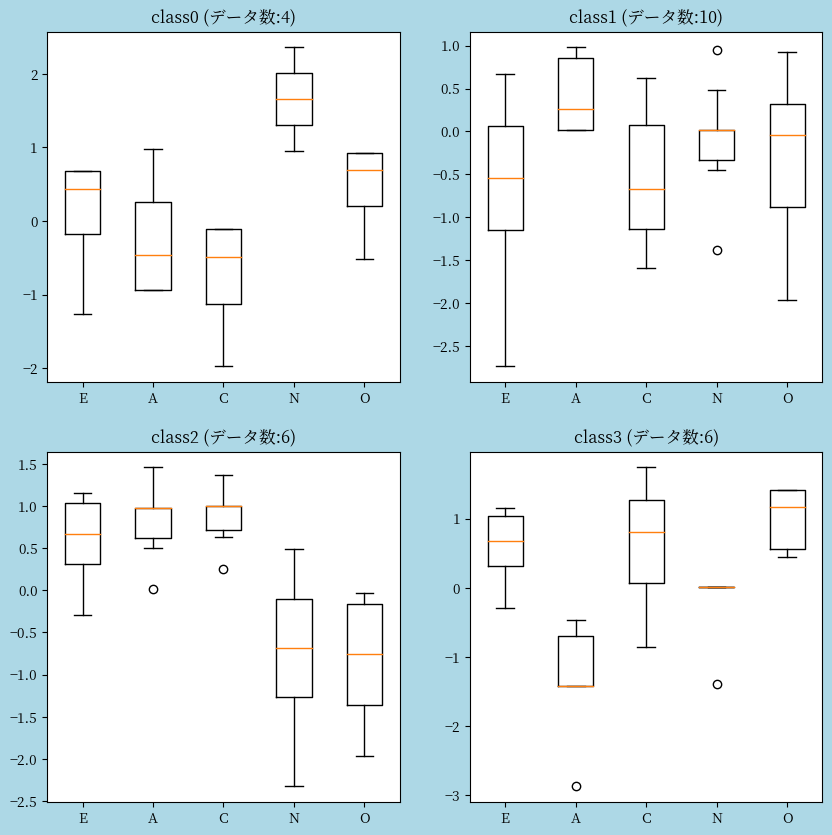

In [70]:
columns = ['E', 'A', 'C', 'N', 'O']
df = pd.DataFrame.from_dict(TP, orient='index', columns=columns)
sc = StandardScaler()
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

model = KMeans(n_clusters=4, random_state=random_state)
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster
show_boxplot(df)